# Data Analytics: COVID Edition

In diesem Notebook sammeln wir unsere Ergebnisse und dokumentieren den Weg dorthin.

## Verbindung mit Datenbank

Zunächst importieren wir die für unser Projekt benötigten Bibliotheken: Pandas zur Datenverarbeitung und Datenmanipulation, MySQL zur Verbindung mit einer MySQL-Datenbank und Matplotlib für die Visualisierung und Darstellung von Daten in Diagrammen oder Plots.
Danach verbinden wir uns mit der Datenbank und legen fest, welche Tables wir benutzen. Insgesamt haben wir zwei Tables, die wir im Laufe der Ausarbeitung nutzen wollen: Einen Datensatz, der die täglichen Starts und Landungen an europäischen Flughäfen in den Jahren 2016 bis 2023 angibt und einen weiteren Datensatz, welcher die Anzahl der täglichen Covid-19 Inzidenzen protokolliert. Beide Datensätze sollen im Laufe der Arbeit in Verbindung gebracht werden. Daher speichern wir die Daten in den Variablen df_flightdata und df_covifd19 zwischen. Schlussendlich schließen wir noch die Verbindung zur Datenbank, da die Tables jetzt in den zwei eben genannten Variablen zwischengespeichert wurden.

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as date
connection = mysql.connector.connect(
    host='XX.XX.XX.XX',
    user='data_analytics',
    password='johnxjulian',
    database='aviation'
)
query_flightdata = "SELECT * FROM aviation"
query_covid19 = "SELECT * FROM covid19"
df_flightdata = pd.read_sql(query_flightdata, connection)
df_covid19 = pd.read_sql(query_covid19, connection)
connection.close()

/var/folders/qw/txn17vkn66vf_9pc5h1j29ph0000gn/T/ipykernel_82605/1205422187.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_flightdata = pd.read_sql(query_flightdata, connection)
/var/folders/qw/txn17vkn66vf_9pc5h1j29ph0000gn/T/ipykernel_82605/1205422187.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_covid19 = pd.read_sql(query_covid19, connection)


## Deutsche Flughäfen sotiert nach Verkehrsaufkommen

1. Die größten Flughäfen herausfinden: Wir wollen die gesamten Starts und Landungen aller deutschen Flughäfen einzeln addiere und daraus ablesen, was die 5 größten Flughäfen in Deutschland sind, gemessen an der Anzahl der Starts und Landungen in den Jahren 2016 bis 2023.
Im späteren Verlauf schauen wir dann anhand der Anzahl der Flüge in den Jahren 2020-2022, wie die Lage an diesen Flughäfen in den Corona Hochjahren aussah und wie es vor Corona aussah.

In [2]:
german_airports = df_flightdata[df_flightdata['Land_Name'] == 'Germany']
airports_and_flights = german_airports.groupby(['ICAO_Code', 'Airport_Name'])['Gesamte_Anzahl_an_Flügen'].sum().reset_index()
sorted_airport_and_flights = airports_and_flights.sort_values(by='Gesamte_Anzahl_an_Flügen', ascending=False)
top_5_airports = sorted_airport_and_flights.head(5)
top_5_airports.loc[:, 'Gesamte_Anzahl_an_Flügen'] = top_5_airports['Gesamte_Anzahl_an_Flügen'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))

top_5_airports

,ICAO_Code,Airport_Name,Gesamte_Anzahl_an_Flügen
3,EDDF,Frankfurt,3.217.729
8,EDDM,Munich,2.474.821
7,EDDL,Dusseldorf,1.324.624
6,EDDK,Cologne-Bonn,952.245
5,EDDH,Hamburg,937.746


Der Übersicht halber sollen die 5 größten Flughäfen Deutschlands nun einmal als Balkendiagramm dargestellt werden. So ist schnell ein Vergleich gezogen und ist direkt sichtbar, welches der größte Flughafen ist.

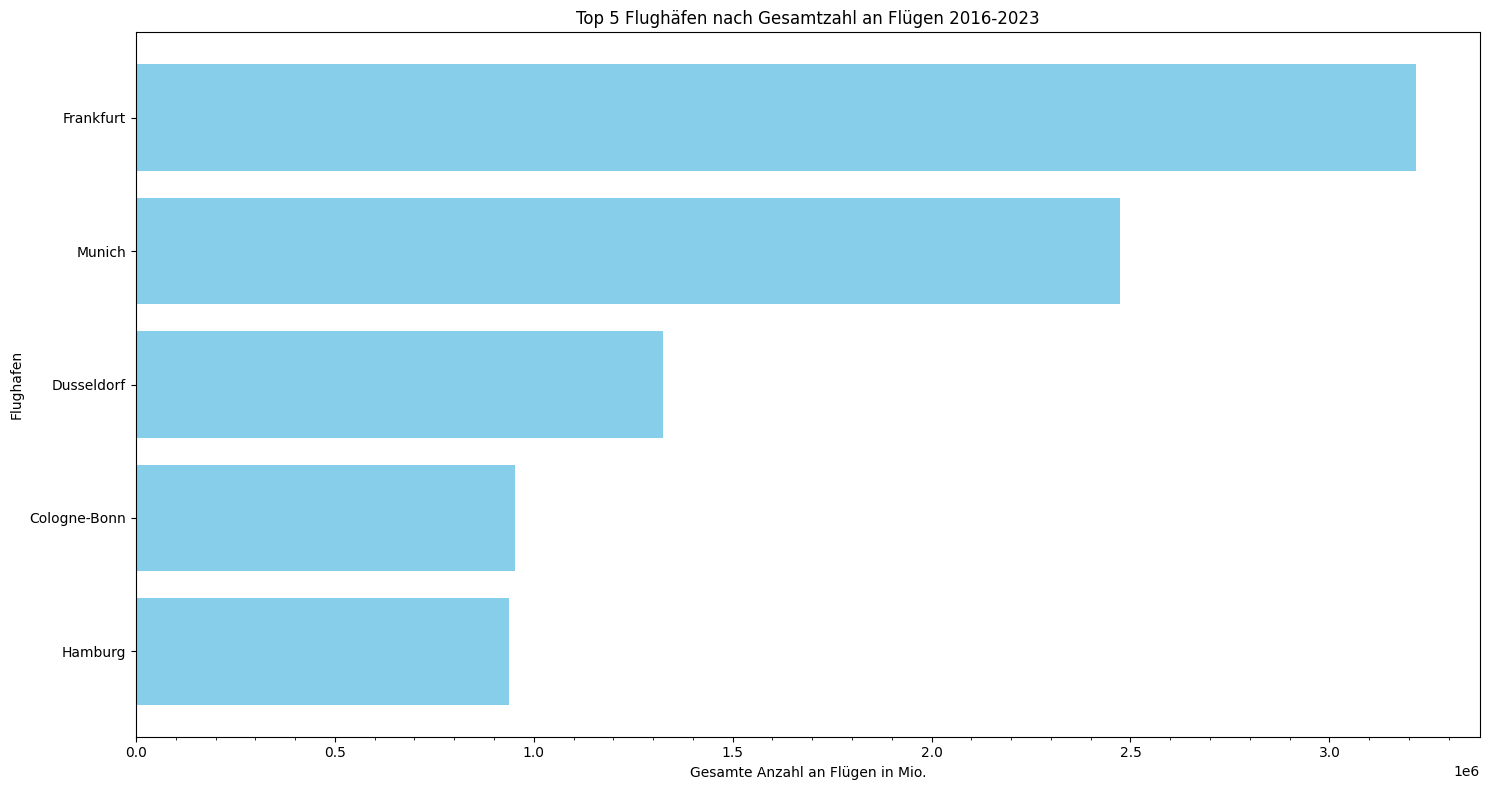

In [3]:
top_5_airports_sorted = sorted_airport_and_flights.head(5).sort_values(by='Gesamte_Anzahl_an_Flügen', ascending=True)

plt.figure(figsize=(15, 8))
plt.barh(top_5_airports_sorted['Airport_Name'], top_5_airports_sorted['Gesamte_Anzahl_an_Flügen'], color='skyblue')
plt.xlabel('Gesamte Anzahl an Flügen in Mio.')
plt.ylabel('Flughafen')
plt.title('Top 5 Flughäfen nach Gesamtzahl an Flügen 2016-2023')

x_locator = ticker.MultipleLocator(base=100000)
y_locator = ticker.MultipleLocator(base=500000)
plt.gca().xaxis.set_major_locator(y_locator)
plt.gca().xaxis.set_minor_locator(x_locator)

plt.tight_layout()
plt.show()

Wir können also festhalten, dass dies die 5 größten Flughäfen Deutschlands sind. Gemessen an ihren täglichen Starts und Landungen in den Jahren 2016 bis 2023. 


2. Die kleinsten Flughäfen herausfinden: Wir wollen nun auch die 5 kleinsten Flughäfen in Deutschland herausfinden, auch dieses mal gemessen an der Anzahl der Starts und Landungen in den Jahren 2016 bis 2023.

In [4]:
sorted_airport_and_flights_ascending = airports_and_flights.sort_values(by='Gesamte_Anzahl_an_Flügen', ascending=True)
lowest_5_airports = sorted_airport_and_flights_ascending.head(5)
lowest_5_airports.loc[:, 'Gesamte_Anzahl_an_Flügen'] = lowest_5_airports['Gesamte_Anzahl_an_Flügen'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))

lowest_5_airports

,ICAO_Code,Airport_Name,Gesamte_Anzahl_an_Flügen
2,EDDE,Erfurt,34.223
11,EDDR,Saarbruecken,54.336
1,EDDC,Dresden,126.784
4,EDDG,Muenster-Osnabrueck,132.385
15,EDDW,Bremen,192.085


Und nun wieder das passende Balkendiagramm: 

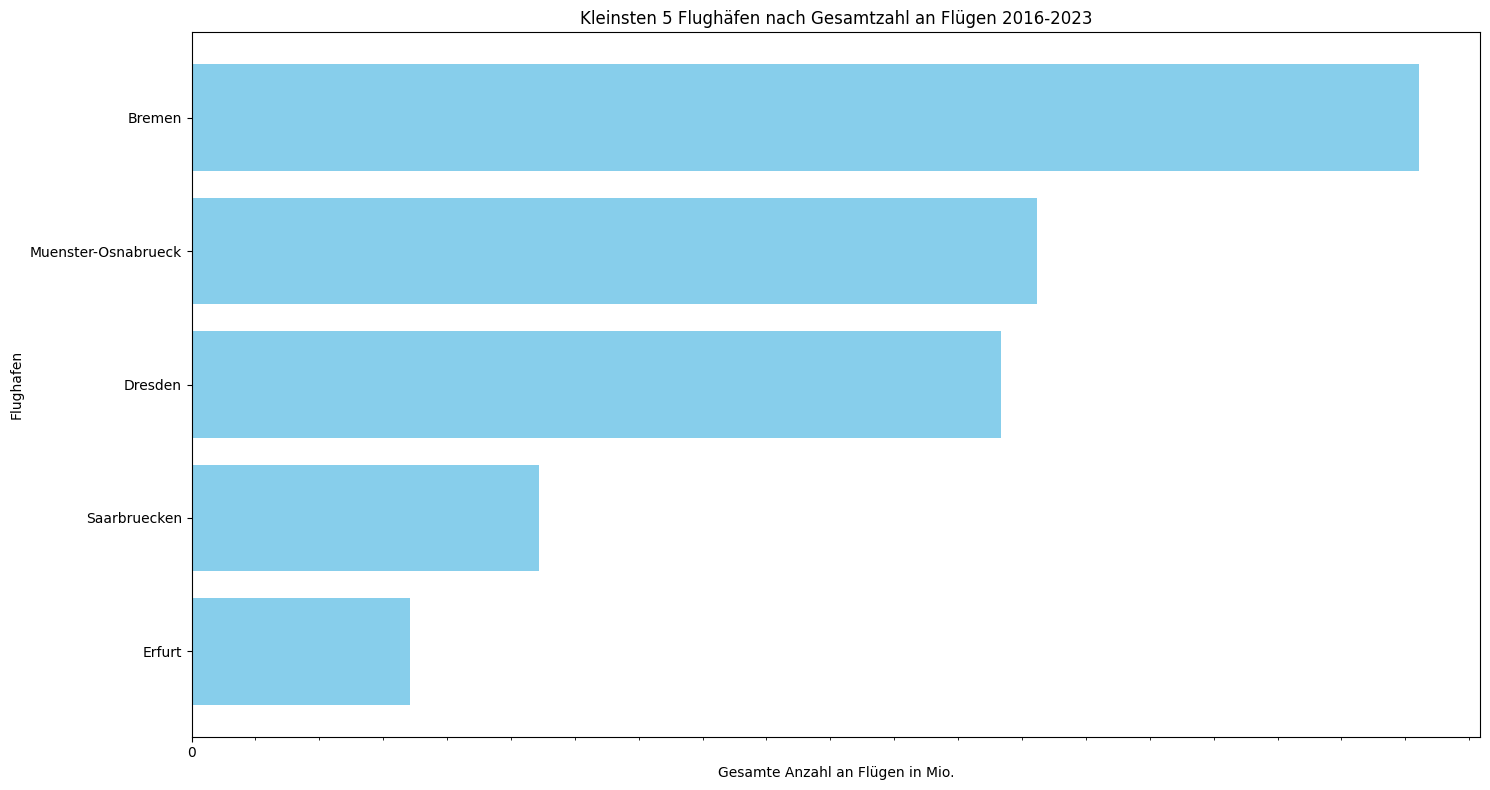

In [5]:
lowest_5_airports_sorted = sorted_airport_and_flights_ascending.head(5).sort_values(by='Gesamte_Anzahl_an_Flügen')

plt.figure(figsize=(15, 8))
plt.barh(lowest_5_airports_sorted['Airport_Name'], lowest_5_airports_sorted['Gesamte_Anzahl_an_Flügen'], color='skyblue')
plt.xlabel('Gesamte Anzahl an Flügen in Mio.')
plt.ylabel('Flughafen')
plt.title('Kleinsten 5 Flughäfen nach Gesamtzahl an Flügen 2016-2023')

x_locator = ticker.MultipleLocator(base=10000)
y_locator = ticker.MultipleLocator(base=500000)
plt.gca().xaxis.set_major_locator(y_locator)
plt.gca().xaxis.set_minor_locator(x_locator)

plt.tight_layout()
plt.show()

Die kleinsten deutschen Flughäfen sind also Bremen, Münster-Osnabrück, Dresden, Saarbrücken und Schlusslicht Erfurt. Hier nochmal der kleine Hinweis, dass kleine Feld und Wiesen Flughäfen wie Braunschweig nicht im Datensatz auftauchen.

3. An welchem Tag in den Jahren 2016-2023 wurde am meisten an den jeweiligen Top 5 Flughäfen geflogen?

In [6]:
for index, airport in top_5_airports.iterrows():
    airport_name = airport['Airport_Name']
    airport_flights = df_flightdata[df_flightdata['Airport_Name'] == airport_name]
    
    flights_per_day = airport_flights.groupby('Datum')['Gesamte_Anzahl_an_Flügen'].sum().reset_index()
    day_most_flights = flights_per_day.loc[flights_per_day['Gesamte_Anzahl_an_Flügen'].idxmax()]

    print(f"Am meisten wurde am {day_most_flights['Datum']} am Flughafen {airport_name} geflogen.")
    print(f"An diesem Tag wurden insgesamt {day_most_flights['Gesamte_Anzahl_an_Flügen']} Flüge durchgeführt.\n")



Am meisten wurde am 11.09.2019 am Flughafen Frankfurt geflogen.
An diesem Tag wurden insgesamt 1628 Flüge durchgeführt.

Am meisten wurde am 05.10.2018 am Flughafen Munich geflogen.
An diesem Tag wurden insgesamt 1341 Flüge durchgeführt.

Am meisten wurde am 17.10.2019 am Flughafen Dusseldorf geflogen.
An diesem Tag wurden insgesamt 754 Flüge durchgeführt.

Am meisten wurde am 26.10.2018 am Flughafen Cologne-Bonn geflogen.
An diesem Tag wurden insgesamt 547 Flüge durchgeführt.

Am meisten wurde am 23.06.2017 am Flughafen Hamburg geflogen.
An diesem Tag wurden insgesamt 548 Flüge durchgeführt.



## Grafische Darstellung der Starts und Landungen der jeweils größten fünf deutschen Flughäfen im Jahr 2019

Die Starts- und Landungen an den fünf größten Flughäfen in Deutschland im Jahr 2019

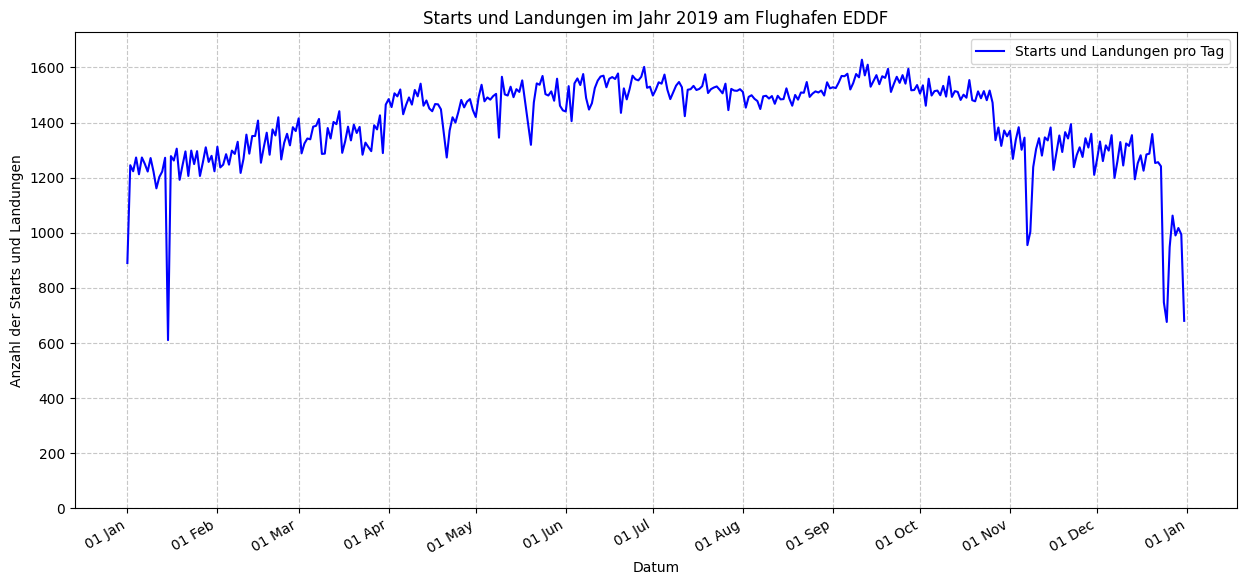

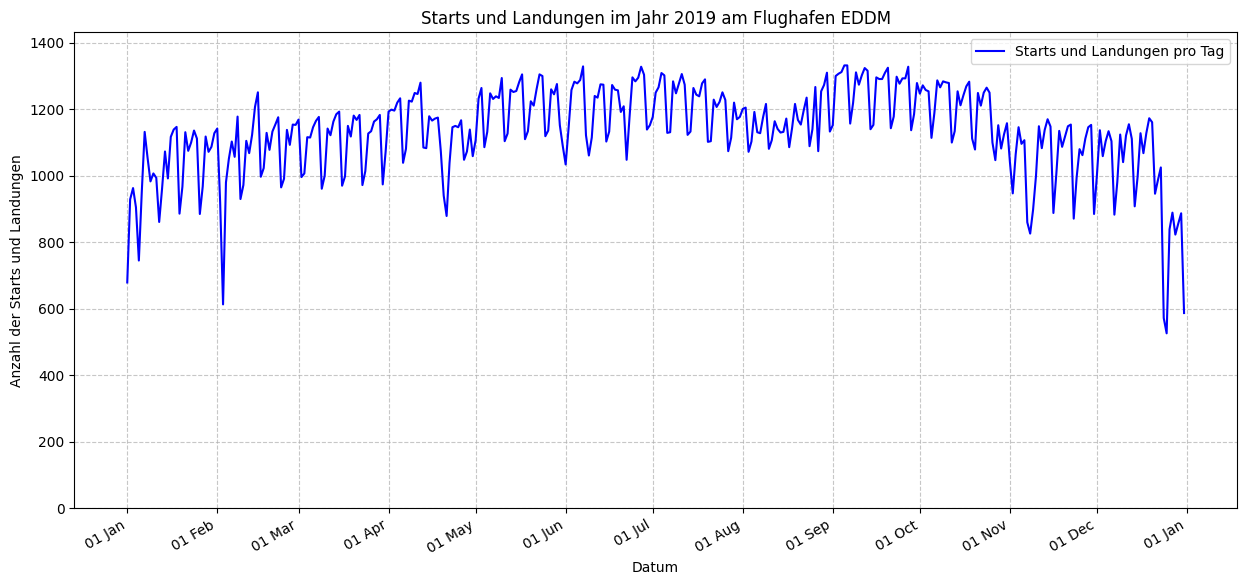

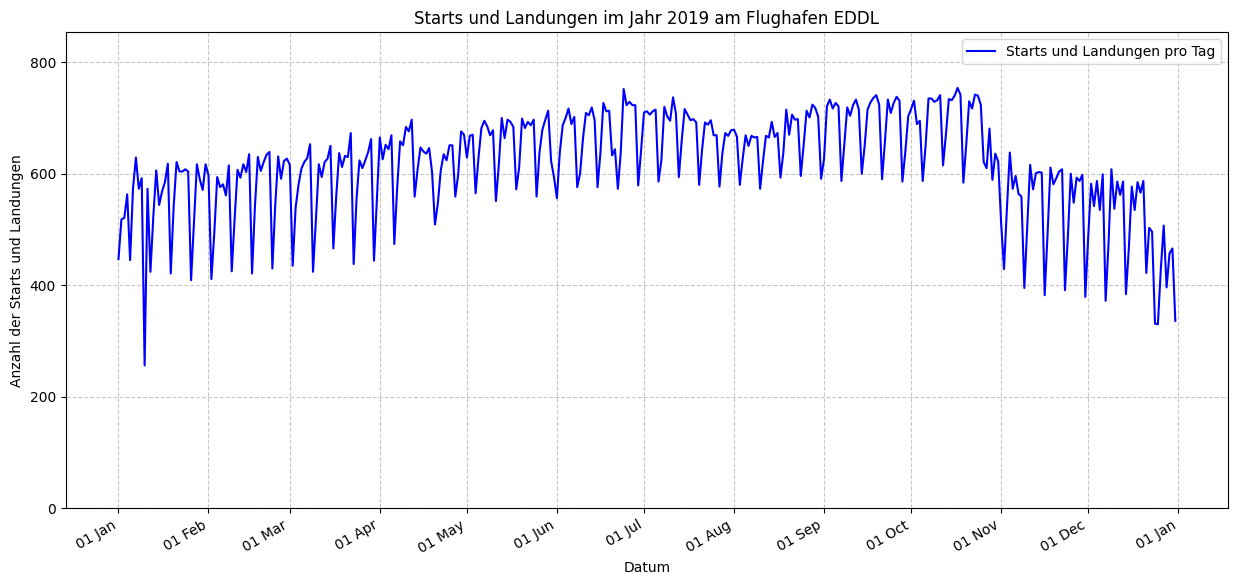

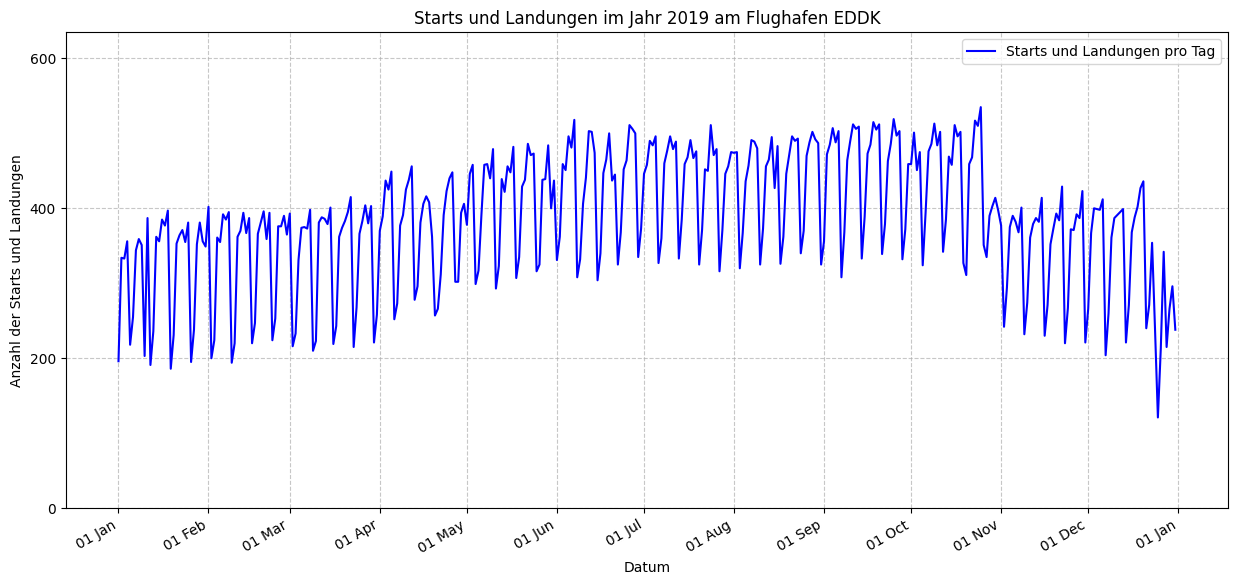

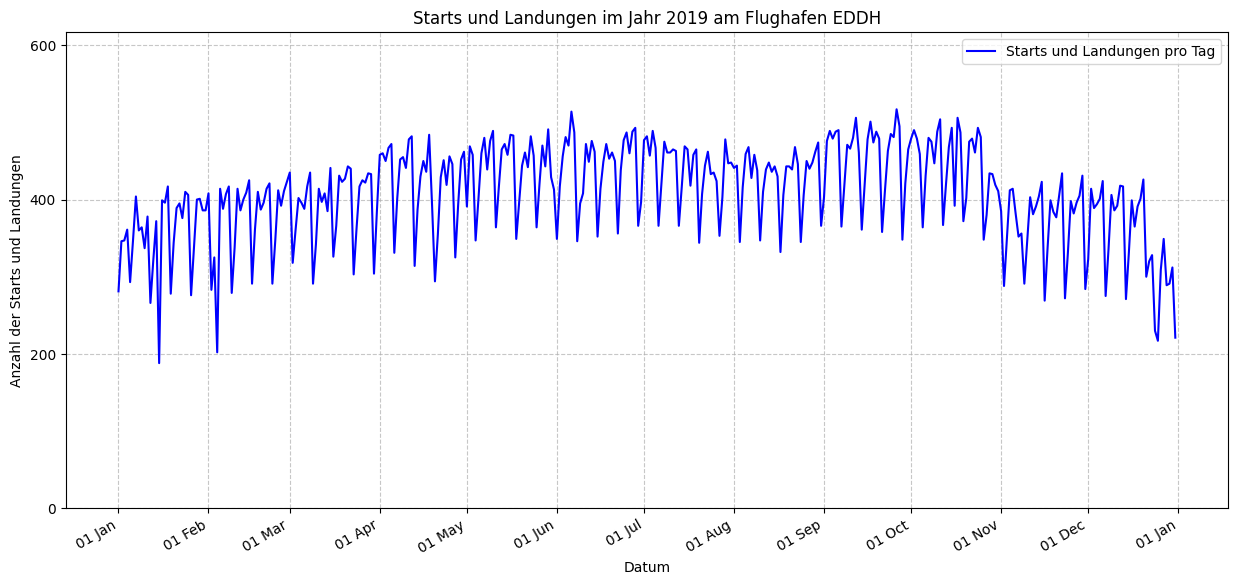

In [7]:
def create_airport_plot(data, year, airport):
    filtered_data = data[(data['Jahr'] == year) &
                         (data['ICAO_Code'] == airport) &
                         (data['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]

    plt.figure(figsize=(15, 7))  

    plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', color='blue')
    
    plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
    plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))
    plt.gca().xaxis.set_major_locator(date.MonthLocator(interval=1))
    
    plt.gcf().autofmt_xdate()

    plt.xlabel('Datum')
    plt.ylabel('Anzahl der Starts und Landungen')
    plt.title(f'Starts und Landungen im Jahr {year} am Flughafen {airport}')
    
    plt.xticks(fontsize=10) 
    
    max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
    plt.yticks(range(0, max_value + 200, 200), fontsize=10)  
    plt.ylim(0, max_value)
    
    plt.grid(True, linestyle='--', alpha=0.7)  
    
    plt.legend()
    plt.show()

for airport_code in top_5_airports['ICAO_Code']:
    create_airport_plot(df_flightdata, 2019, airport_code)


## Grafische Darstellung der Starts und Landungen der jeweils größten fünf deutschen Flughäfen im Jahr 2020

Die Starts- und Landungen am Frankfurter Flughafen im Jahr 2020

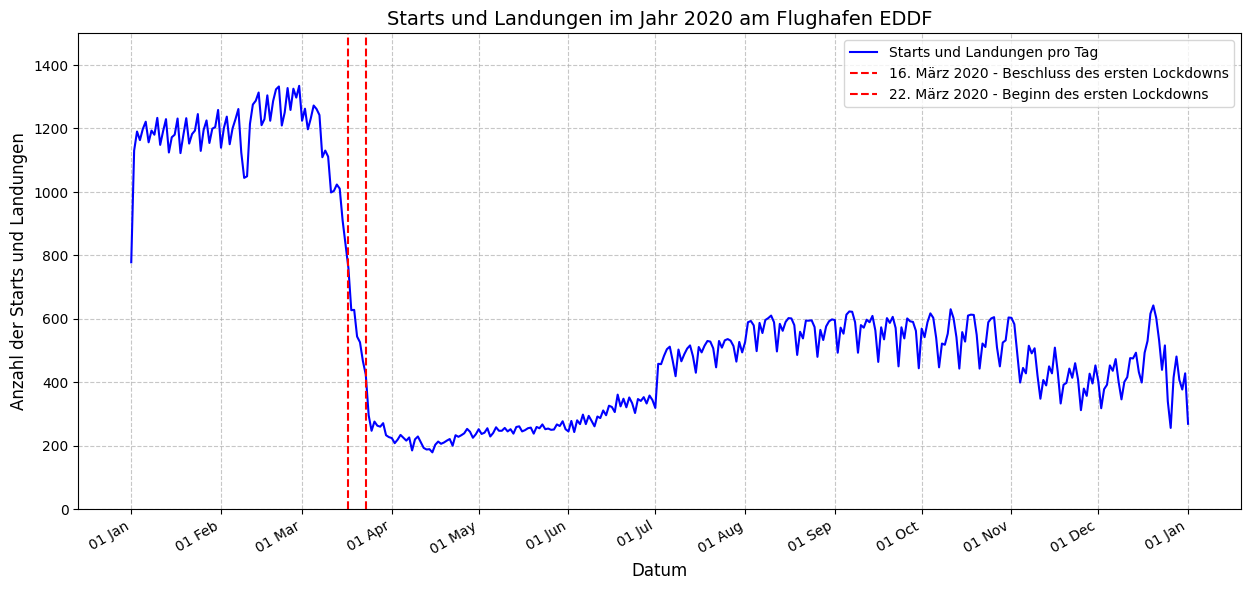

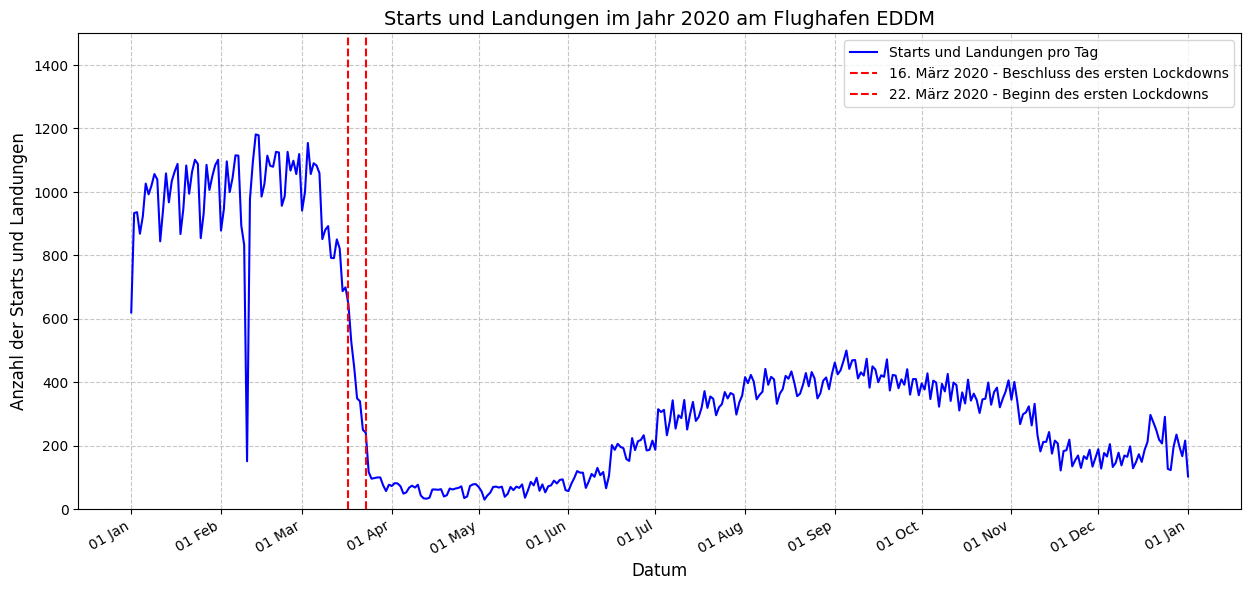

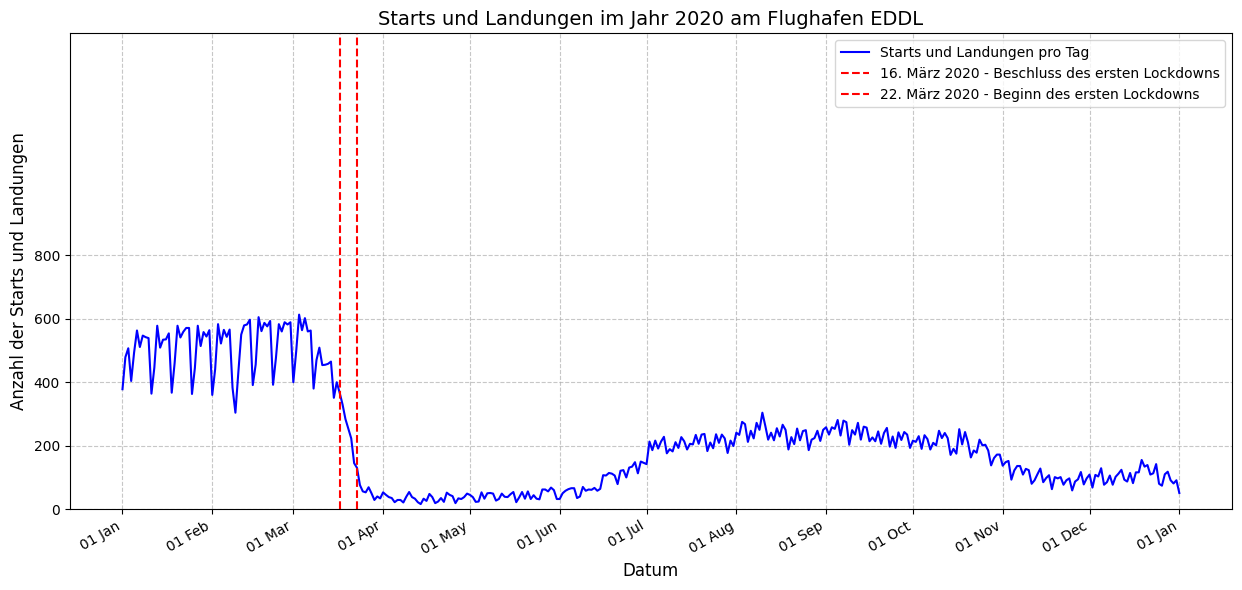

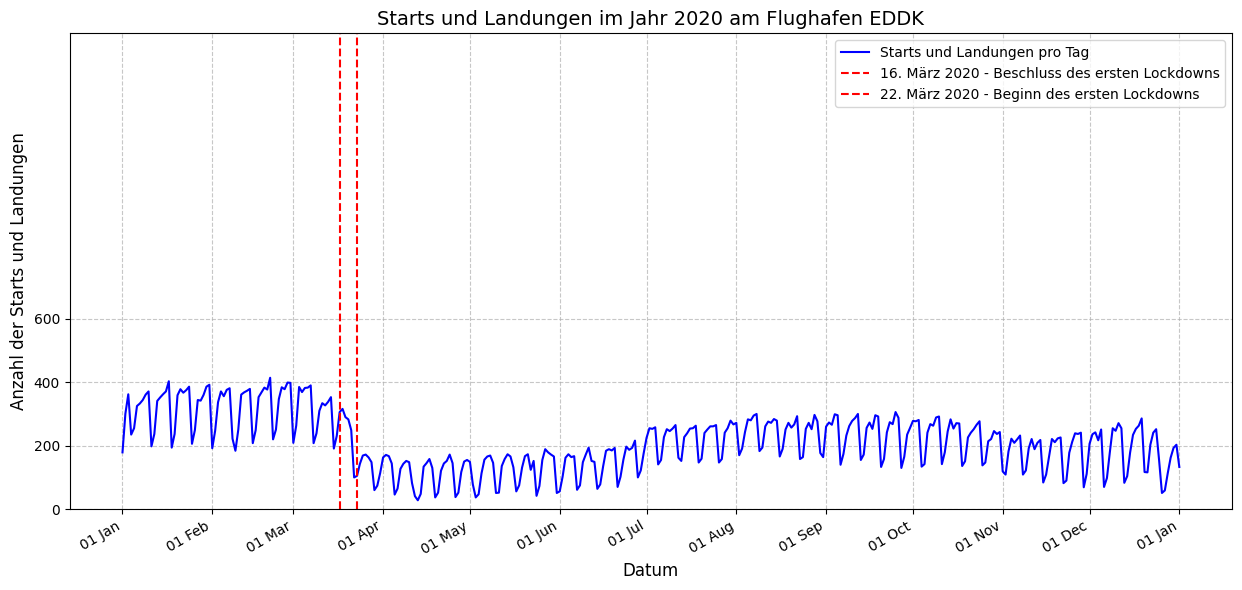

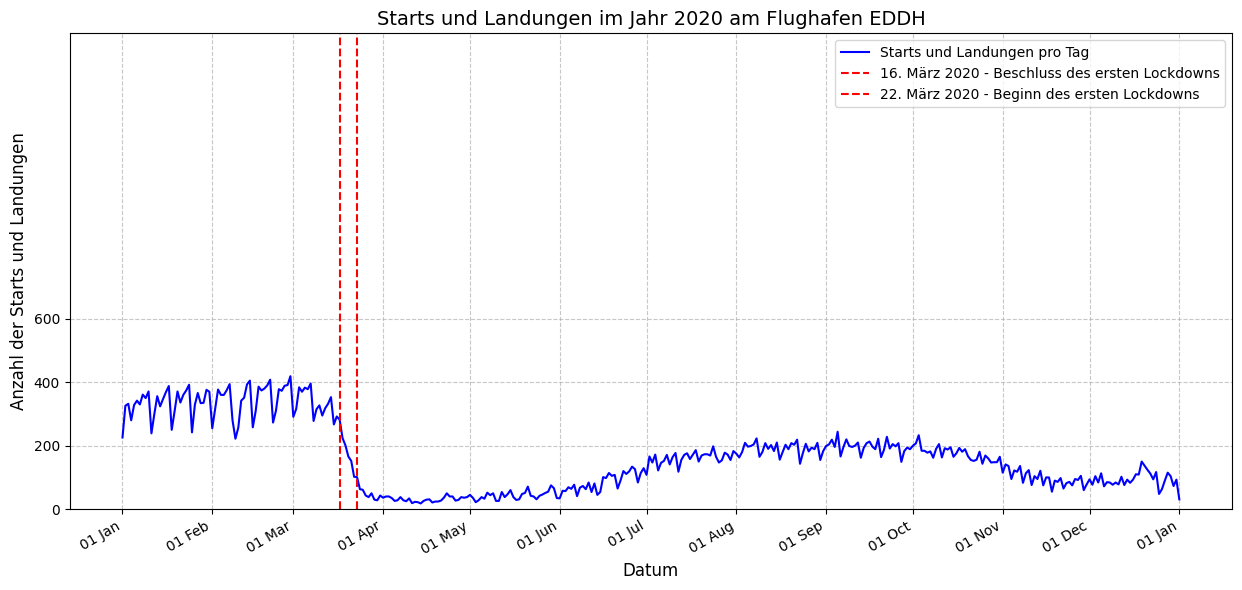

In [8]:
def create_airport_plot(data, year, airport):
    filtered_data = data[(data['Jahr'] == year) &
                         (data['ICAO_Code'] == airport) &
                         (data['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]
    
    plt.figure(figsize=(15, 7))
    
    plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')
    
    plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
    plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))
    plt.gcf().autofmt_xdate()

    plt.axvline(x='16.03.2020', color='red', linestyle='--', label='16. März 2020 - Beschluss des ersten Lockdowns')
    plt.axvline(x='22.03.2020', color='red', linestyle='--', label='22. März 2020 - Beginn des ersten Lockdowns')

    plt.xlabel('Datum', fontsize=12)
    plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
    plt.title(f'Starts und Landungen im Jahr {year} am Flughafen {airport}', fontsize=14)

    plt.legend(fontsize=10, loc='upper right')  
    
    max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
    plt.yticks(range(0, max_value + 200, 200), fontsize=10) 
    plt.ylim(0, 1500)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

for airport_code in top_5_airports['ICAO_Code']:
    create_airport_plot(df_flightdata, 2020, airport_code)

Im Vergleich dazu einmal die Starts- und Landungen in den selben zwei Zeiträumen, dieses mal jedoch am drittgrößten Aiport Deutschlands, Köln-Bonn. Besonders ist hier, dass es sich bei dem Flughafen um einen großen Frachtflughafen handelt. 

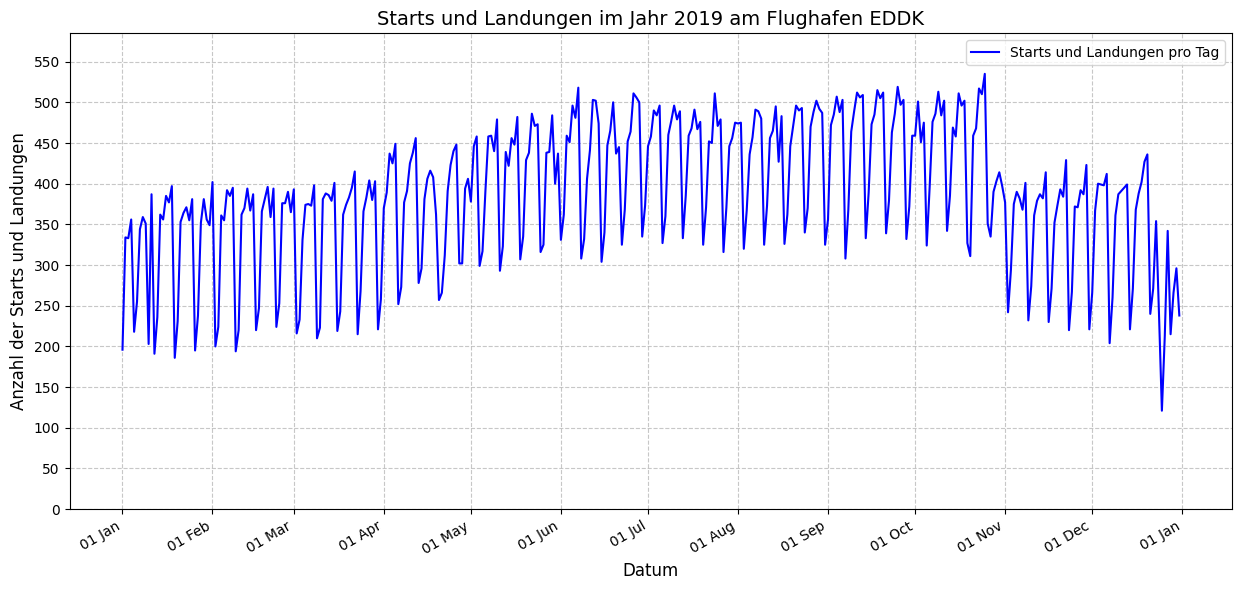

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as date

year = 2019
airport = 'EDDK'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['ICAO_Code'] == airport) &
                              (df_flightdata['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))
plt.gcf().autofmt_xdate()

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Jahr {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 50
plt.yticks(range(0, max_value, 50), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10, loc='upper right')

plt.show()


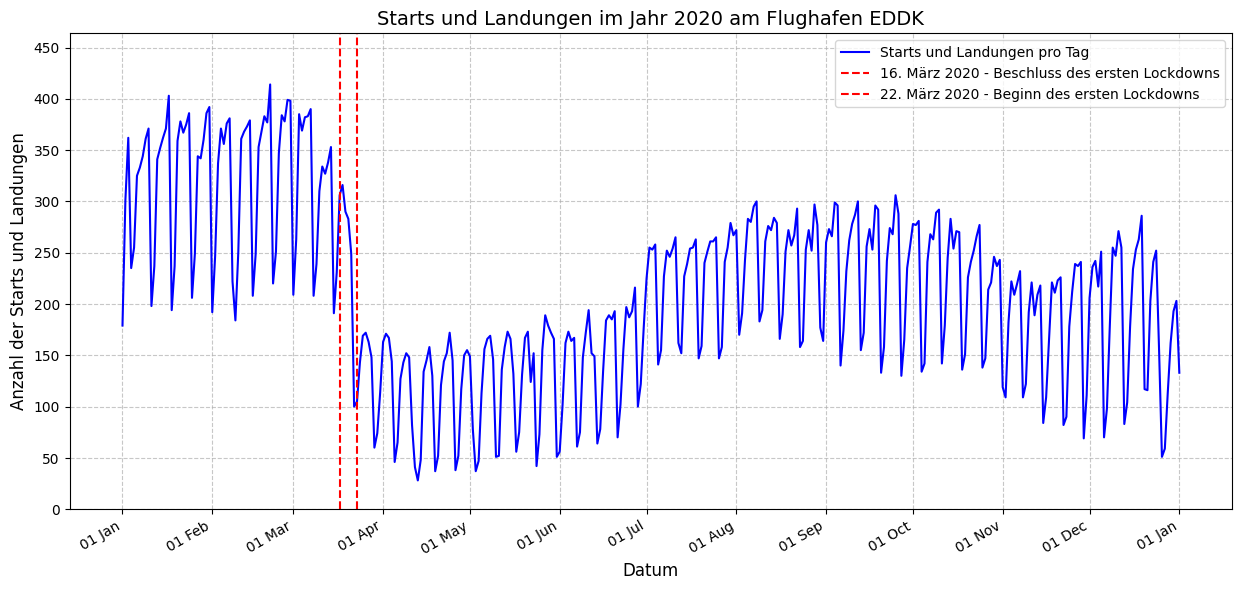

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as date

year = 2020
airport = 'EDDK'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['ICAO_Code'] == airport)]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))
plt.gcf().autofmt_xdate()

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Jahr {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 50
plt.yticks(range(0, max_value, 50), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.axvline(x='16.03.2020', color='red', linestyle='--', label='16. März 2020 - Beschluss des ersten Lockdowns')
plt.axvline(x='22.03.2020', color='red', linestyle='--', label='22. März 2020 - Beginn des ersten Lockdowns')

plt.legend(fontsize=10, loc='upper right')

plt.show()

Auffällig ist hier natürlich, dass ein weitaus geringerer Einbruch im Jahr 2020 zu verzeichnen ist. Dies kann damit begründet werden, dass der Flughafen ein wichtiges Frachtdrehkreuz, auch während der Covid19 Pandemie, darstellt. Frachtflugzeuge flogen weiterhin während der Pandemie und unterlagen keinen Auflagen. (Quellen fehlen)

## Beispiele für Ausreißer in den Daten

### Streiks am Frankfurter Flughafen
https://www.zeit.de/wirtschaft/2019-01/flugverkehr-streiks-sicherheitspersonal-flughaefen-frankfurt-ausfaelle

Der Tiefpunkt am 15.01.2019 ist mit einem Streik des Sicherheitspersonals am Frankfurter Flughafen zu begründen.


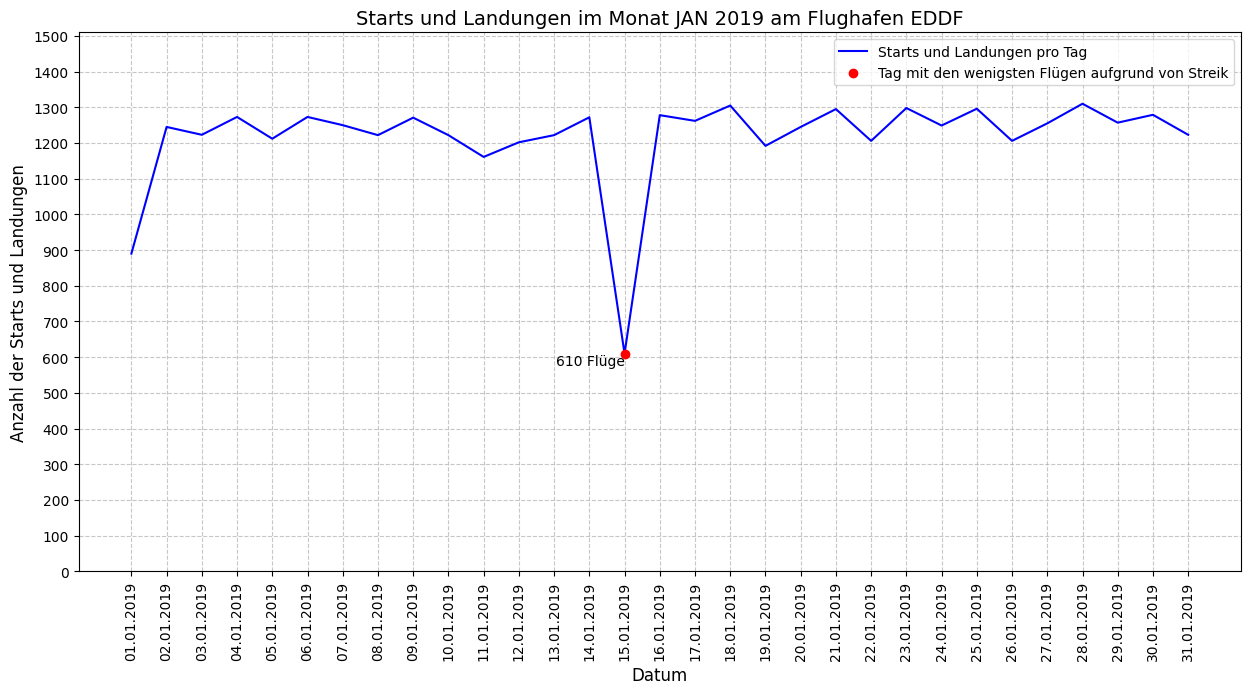

In [11]:
import matplotlib.pyplot as plt

year = 2019
month = 'JAN'
airport = 'EDDF'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport) &
                              (df_flightdata['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]

plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')
lowest_point = filtered_data.nsmallest(1, 'Gesamte_Anzahl_an_Flügen')
plt.scatter(lowest_point['Datum'], lowest_point['Gesamte_Anzahl_an_Flügen'], color='red', label='Tag mit den wenigsten Flügen aufgrund von Streik', zorder=5)

text_x = lowest_point['Datum'].values[0]
text_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.text(text_x, text_y, f'{text_y} Flüge', ha='right', va='top', color='black', fontsize=10)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 200
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()


### Sturm am Münchener Flughafen
https://www.merkur.de/lokales/erding/flughafen-muenchen-ort60188/flughafen-muenchen-unwetter-sturm-sabine-orkan-ausfaelle-landungen-prognose-13530174.html

Und so finden wir an nahezu jedem Flughafen ähnliche Situationen, wo aufgrund von schlechtem Wetter oder Streiks viele bis alle Flüge an einem Tag ausfallen: In München war beispielsweise am 14.02.2020 sehr schlechtes Wetter. Das lässt sich auch in den Flugdaten wiederfinden. 

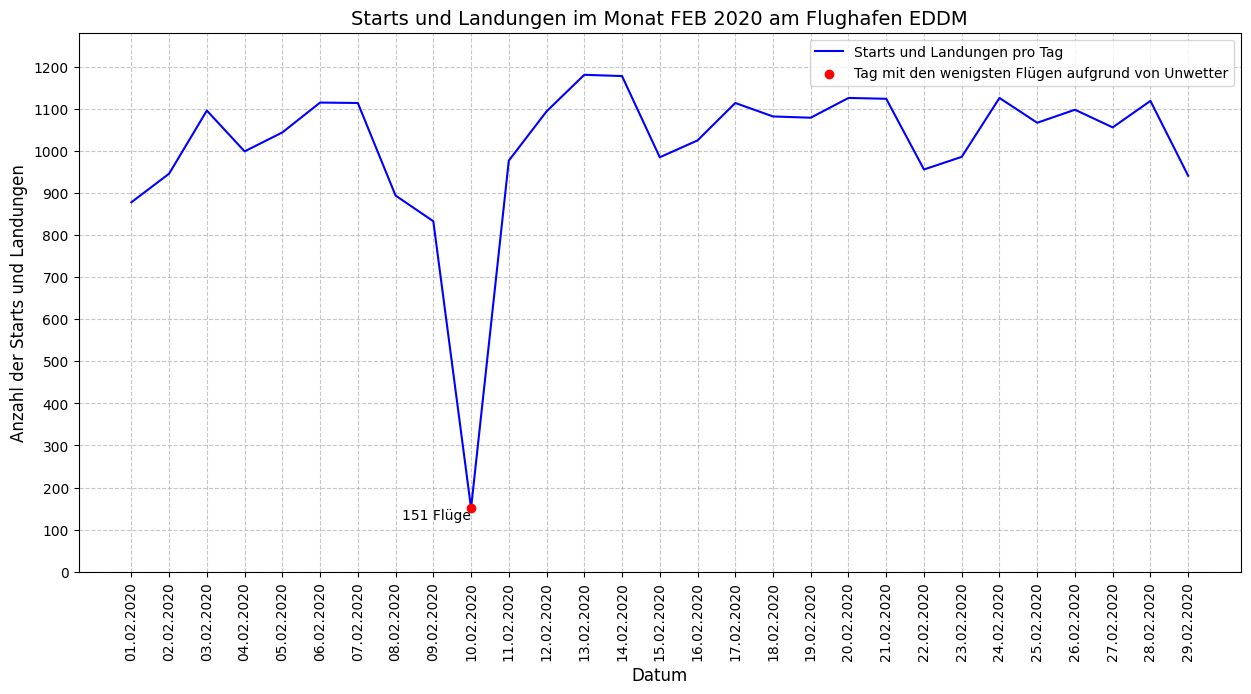

In [12]:
import matplotlib.pyplot as plt

year = 2020
month = 'FEB'
airport = 'EDDM'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport) &
                              (df_flightdata['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

lowest_point = filtered_data.nsmallest(1, 'Gesamte_Anzahl_an_Flügen')
plt.scatter(lowest_point['Datum'], lowest_point['Gesamte_Anzahl_an_Flügen'], color='red', label='Tag mit den wenigsten Flügen aufgrund von Unwetter', zorder=5)

text_x = lowest_point['Datum'].values[0]
text_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.text(text_x, text_y, f'{text_y} Flüge', ha='right', va='top', color='black', fontsize=10)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()


### Geiselnahme am Hamburger Flughafen
https://www.tagesschau.de/inland/gesellschaft/hamburg-flughafen-geiselnahme-beendet-100.html

Am 04.11.2023 ereignete sich eine Geiselnahme am Hamburger Flughafen. Hier war der Flugbetrieb vom Nachmittag des 04.11.2023 bis zum Nachmittag des 05.11.2023 komplett eingestellt. Hier hatte ein Vater seine kleine Tochter, für welche ihm das Sorgerecht entzogen worden war, entführt. Er floh mit ihr zum Hamburger Flughafen, durchbrach dort eine Schranke und gelangte so auf das Rollfeld, wo er nach dem Abwurf von Molotow Cocktails und Warnschüssen fast 24h seine Tochter und sich selbst in seinem Fahrzeug festhielt. Auch dieses Ereignis lässt sich in den Daten wiedererkennen. 

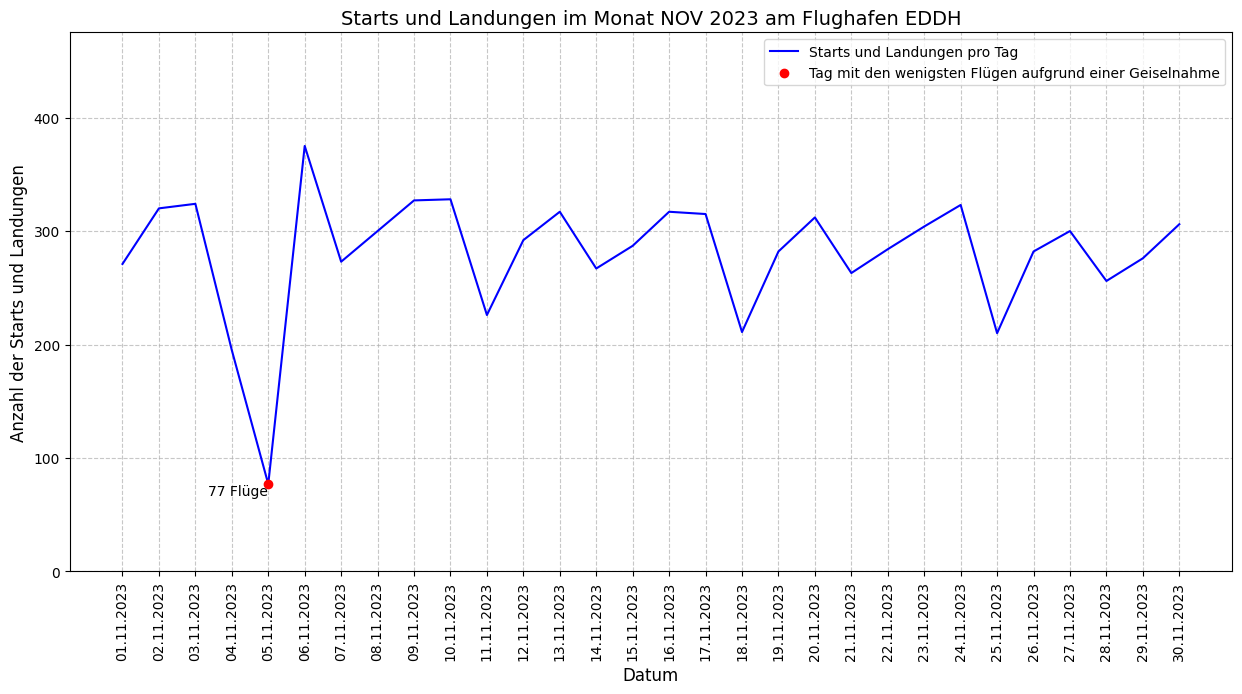

In [13]:
import matplotlib.pyplot as plt

year = 2023
month = 'NOV'
airport = 'EDDH'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport) &
                              (df_flightdata['ICAO_Code'].isin(top_5_airports['ICAO_Code']))]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

lowest_point = filtered_data.nsmallest(1, 'Gesamte_Anzahl_an_Flügen')
plt.scatter(lowest_point['Datum'], lowest_point['Gesamte_Anzahl_an_Flügen'], color='red', label='Tag mit den wenigsten Flügen aufgrund einer Geiselnahme', zorder=5)

text_x = lowest_point['Datum'].values[0]
text_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.text(text_x, text_y, f'{text_y} Flüge', ha='right', va='top', color='black', fontsize=10)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()


### Anschlag am Brüsseler Flughafen
https://www.tagesschau.de/ausland/explosion-am-flughafen-bruessel-105.html

Ende März 2016 war der Flugbetrieb am Brüsseler Flughafen nahezu komplett eingestellt. Hintergrund war ein vorausgegangender Anschlag am 22.03.2016. Hierbei sprengten sich zwei Attentäter in die Luft, vorher fielen bereits mehrere Schüsse. Es sterben 10 Personen, Dutzende werden verletzt. Auch dieses Ereignis findet sich in den Daten wieder. 

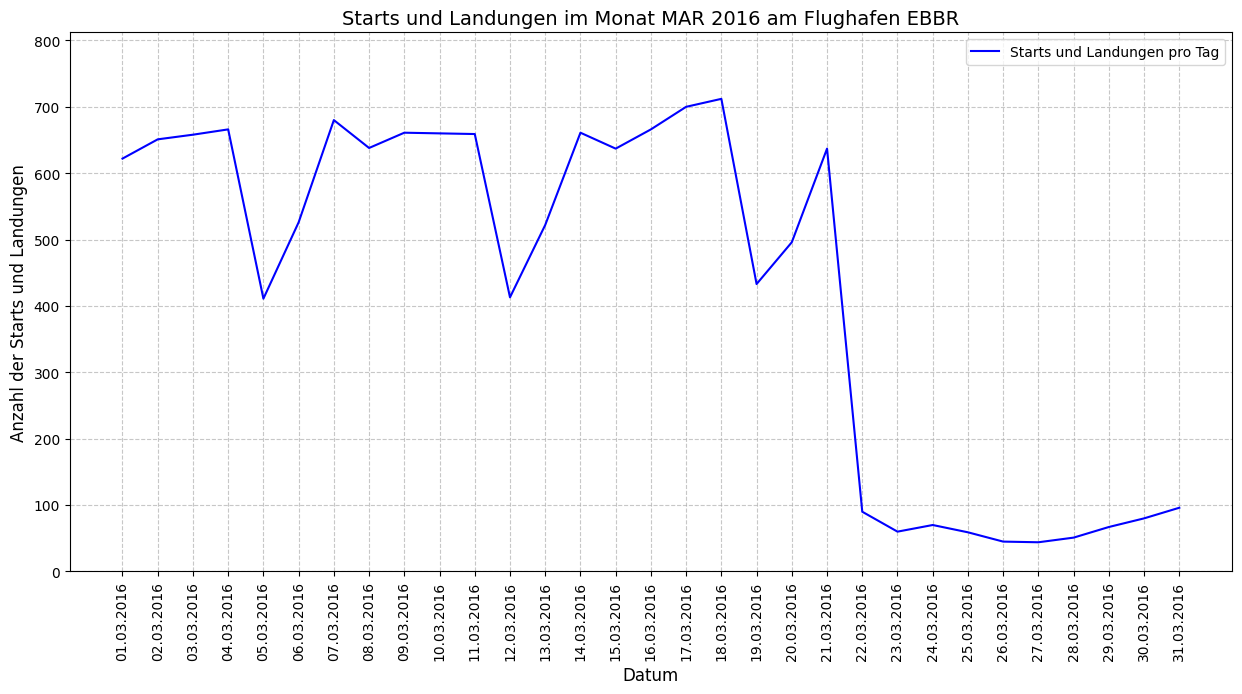

In [14]:
import matplotlib.pyplot as plt

year = 2016
month = 'MAR'
airport = 'EBBR'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport) &
                              (df_flightdata['ICAO_Code'])]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

text_x = lowest_point['Datum'].values[0]
text_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()


### Klimaaktivisten legen Hamburger Flughafen lahm
https://www.ndr.de/nachrichten/hamburg/Klima-Aktivisten-blockieren-Hamburger-Flughafen-fuer-mehrere-Stunden,flughafen2780.html

Am 14.07.2023 legten Aktivisten der 'Letzte Generation' den Flugbetrieb am Hamburger Flughafen für mehrere Stunden lahm, indem sie sich auf eine Rollbahn festklebten. Um 06:10 Uhr wurde der Betrieb eingestellt, um 09:50 Uhr wieder aufgenommen. Es fielen knapp 70 Flüge aus, 10.000 Passagiere kamen verspätet oder gar nicht an ihr Ziel. 

Dieser Einschnitt ist nicht in unseren Daten wiederzufinden. Im Gegenteil: Der 14.07.2023 ist der Tag im Juli, welcher die meisten Starts und Landungen in Hamburg verzeichnet. 

Wie kommt das? 

Obwohl die Aktivisten die Rollbahn blockierten und den Betrieb für einige Stunden stoppten, änderte dies nicht die Tatsache, dass es sich um einen stark frequentierten Tag für den Hamburger Flughafen handelte. Es handelt sich hierbei um eine Kollision zwischen einem ohnehin stark beanspruchten Zeitpunkt für den Flugverkehr und den Blockaden.

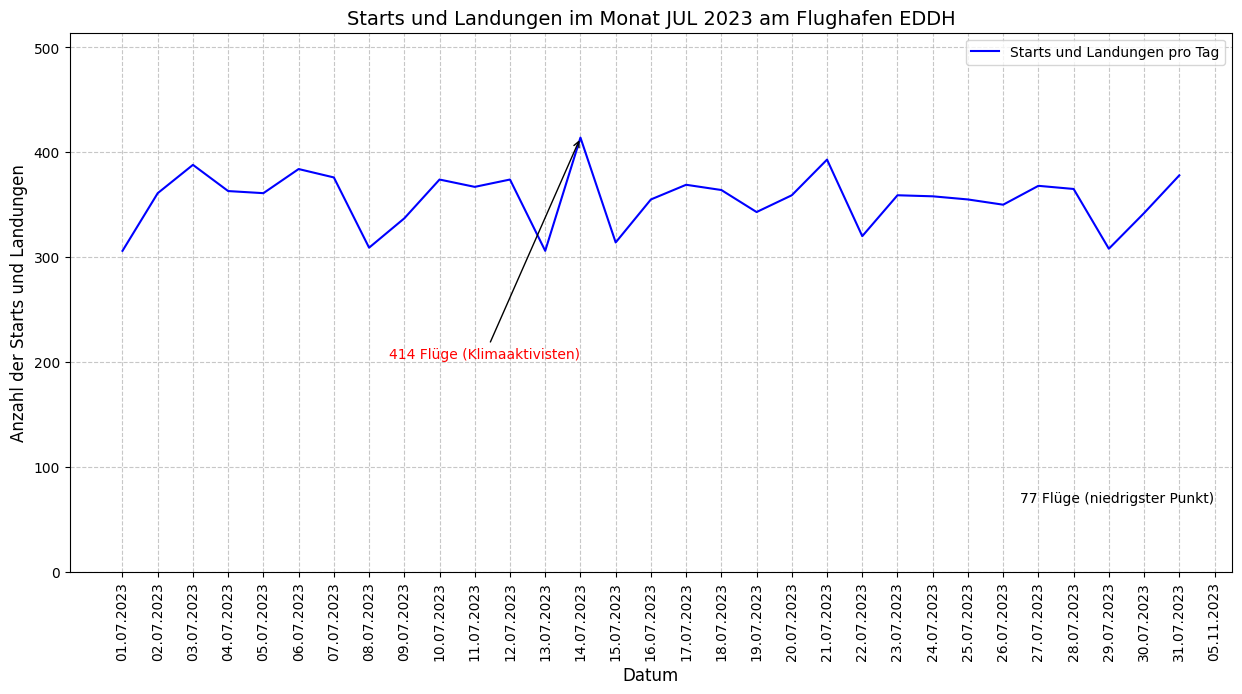

In [15]:
import matplotlib.pyplot as plt

year = 2023
month = 'JUL'
airport = 'EDDH'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport)]

plt.figure(figsize=(15, 7))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

highest_point = filtered_data.nlargest(1, 'Gesamte_Anzahl_an_Flügen')

text_lowest_x = lowest_point['Datum'].values[0]
text_lowest_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]
text_highest_x = highest_point['Datum'].values[0]
text_highest_y = highest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.text(text_lowest_x, text_lowest_y, f'{text_lowest_y} Flüge (niedrigster Punkt)', ha='right', va='top', color='black', fontsize=10)

plt.annotate(f'{text_highest_y} Flüge (Klimaaktivisten)', 
             xy=(text_highest_x, text_highest_y),
             xytext=(text_highest_x, text_highest_y - 200), 
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='right', va='top', color='red', fontsize=10)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()

### Drohnen stören Flugbetrieb am London-Gatwick-Flughafen
https://www.spiegel.de/reise/aktuell/flughafen-london-gatwick-scharfschuetzen-suchen-drohnenpiloten-a-1244875.html

Am 20.12.2018 stören Drohnen den Flugbetrieb am Londoner Flughafen Gatwick. An diesem Tag fallen fast alle Flüge aus, da die Störungen die Flughafenbehörden dazu zwingen, aus Sicherheitsgründen den Betrieb vorübergehend einzustellen. 

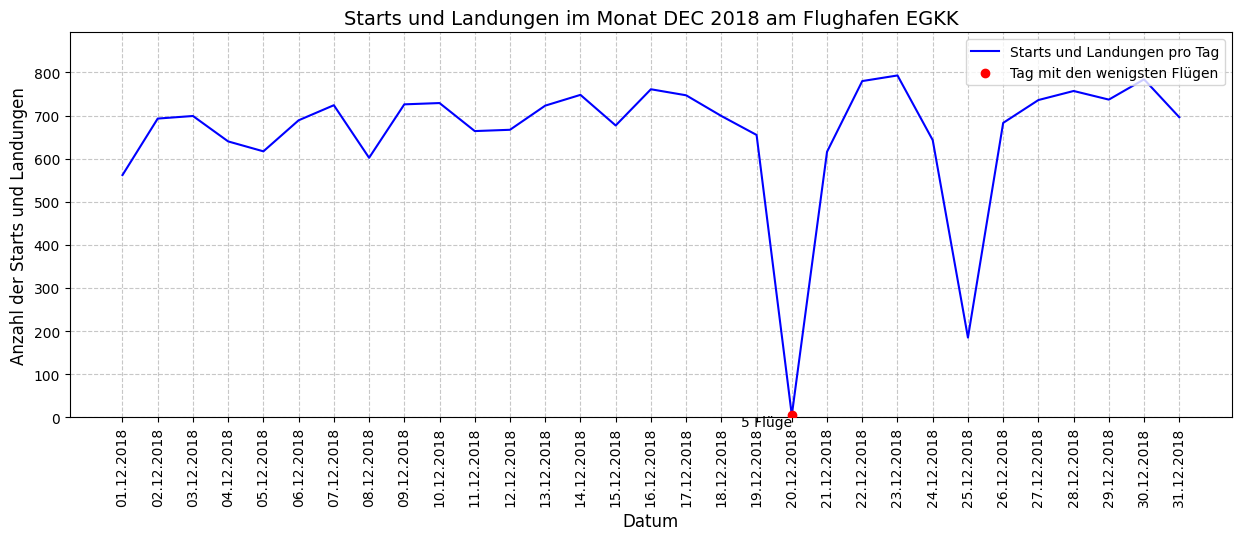

In [16]:
import matplotlib.pyplot as plt

year = 2018
month = 'DEC'
airport = 'EGKK'

filtered_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                              (df_flightdata['Monat'] == month) &
                              (df_flightdata['ICAO_Code'] == airport)]

plt.figure(figsize=(15, 5))

plt.plot(filtered_data['Datum'], filtered_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', linestyle='-', color='blue')

lowest_point = filtered_data.nsmallest(1, 'Gesamte_Anzahl_an_Flügen')
plt.scatter(lowest_point['Datum'], lowest_point['Gesamte_Anzahl_an_Flügen'], color='red', label='Tag mit den wenigsten Flügen', zorder=5)

text_x = lowest_point['Datum'].values[0]
text_y = lowest_point['Gesamte_Anzahl_an_Flügen'].values[0]

plt.text(text_x, text_y, f'{text_y} Flüge', ha='right', va='top', color='black', fontsize=10)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl der Starts und Landungen', fontsize=12)
plt.title(f'Starts und Landungen im Monat {month} {year} am Flughafen {airport}', fontsize=14)

max_value = filtered_data['Gesamte_Anzahl_an_Flügen'].max() + 100
plt.yticks(range(0, max_value, 100), fontsize=10)
plt.ylim(0, max_value)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=90)

plt.legend(fontsize=10, loc='upper right')

plt.show()


## Die Auswirkung der Covid19-Pandemie auf den deutschen Flugverkehr

Nun wollen wir die eben erhobenen Diagramme um die Covid19 Fallzahlen erweitern, um zu prüfen, ob die Anzahl der Flugbewegungen mit den Covid-19 Fallzahlen korreliert oder ob es einen Zusammenhang zwischen ihnen gibt. Das ermöglicht es, potenzielle Auswirkungen der Pandemie auf den Flugverkehr zu untersuchen und mögliche Trends oder Muster zu identifizieren.

     Jahr  Meldedatum  Altersgruppe  Faelle_gesamt  Faelle_neu  \
0    2020  03.01.2020             0              1           1   
1    2020  04.01.2020             0              1           0   
2    2020  05.01.2020             0              1           0   
3    2020  06.01.2020             0              1           0   
4    2020  07.01.2020             0              1           0   
..    ...         ...           ...            ...         ...   
359  2020  27.12.2020             0        1650353       11552   
360  2020  28.12.2020             0        1660163        9810   
361  2020  29.12.2020             0        1675860       15697   
362  2020  30.12.2020             0        1703407       27547   
363  2020  31.12.2020             0        1734462       31055   

     Inzidenz_7-Tage  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
359             1717  
360             1667  


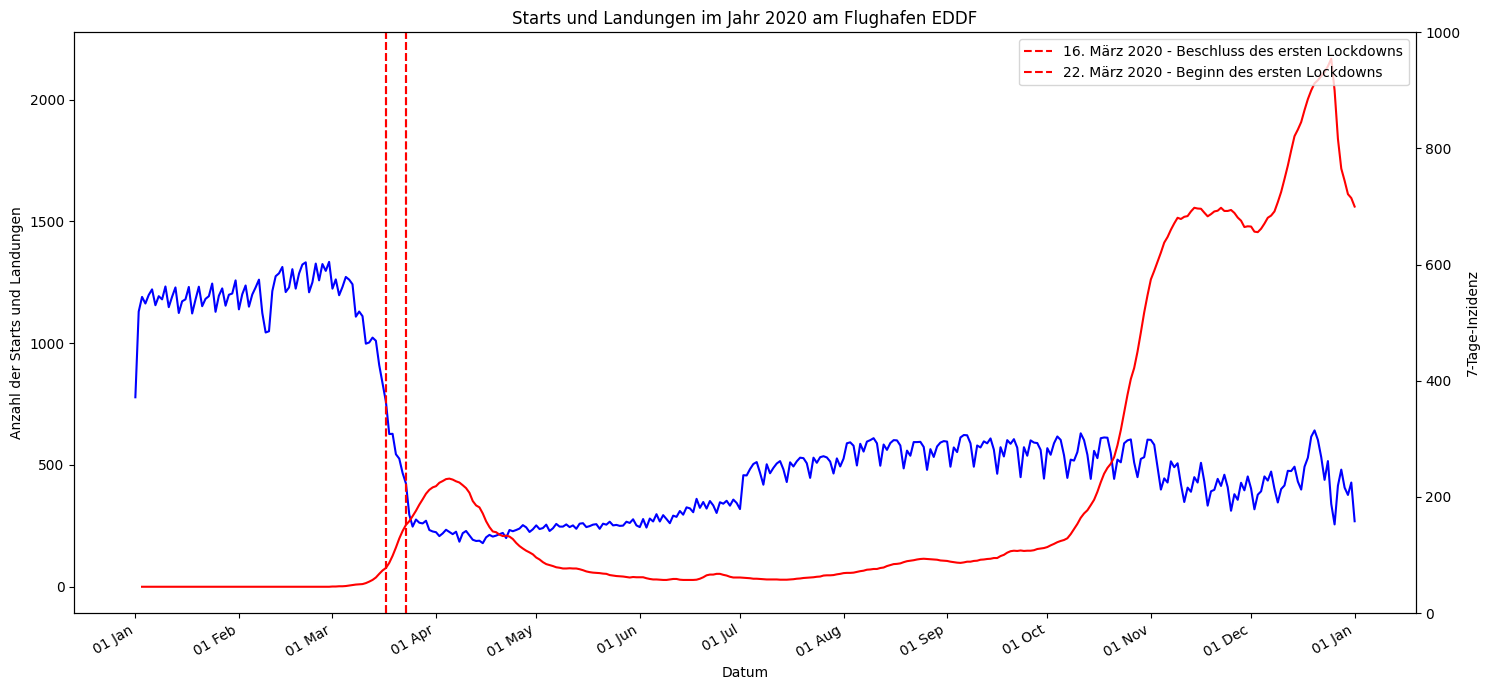

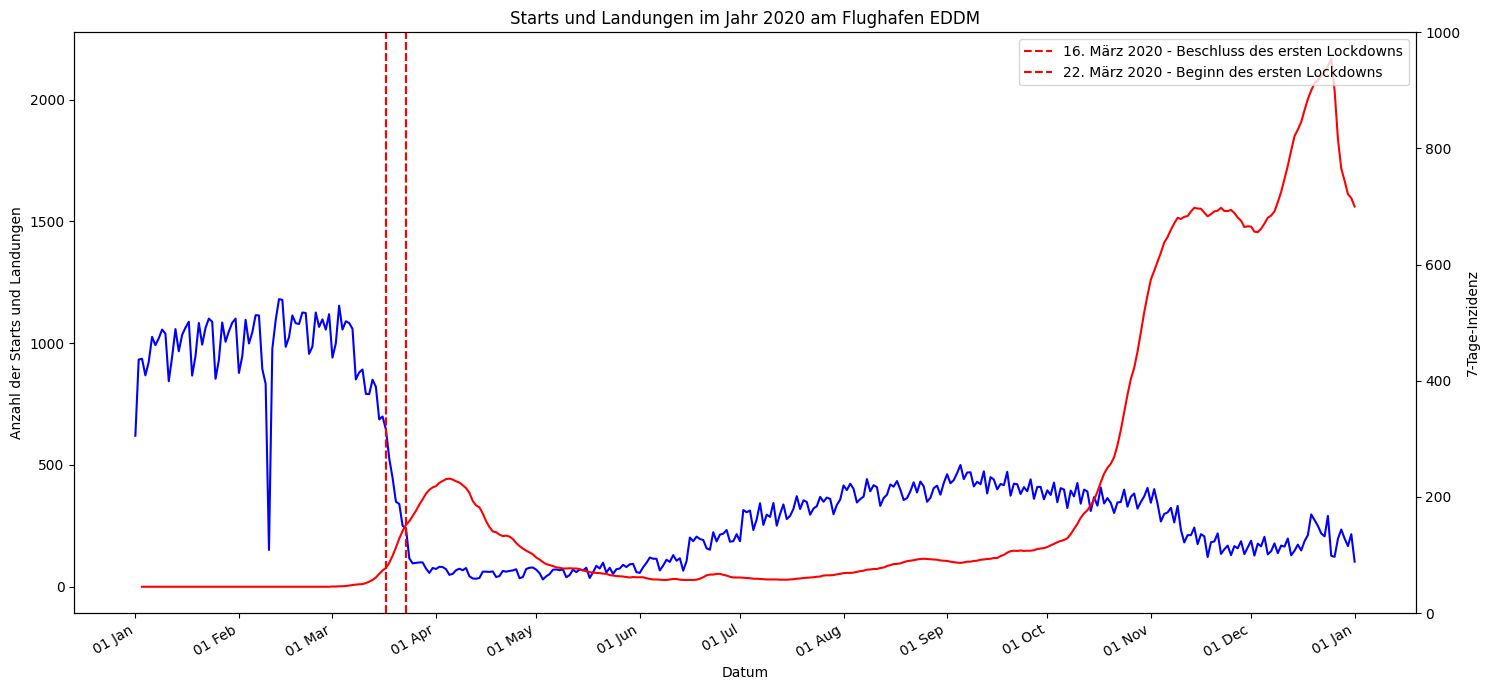

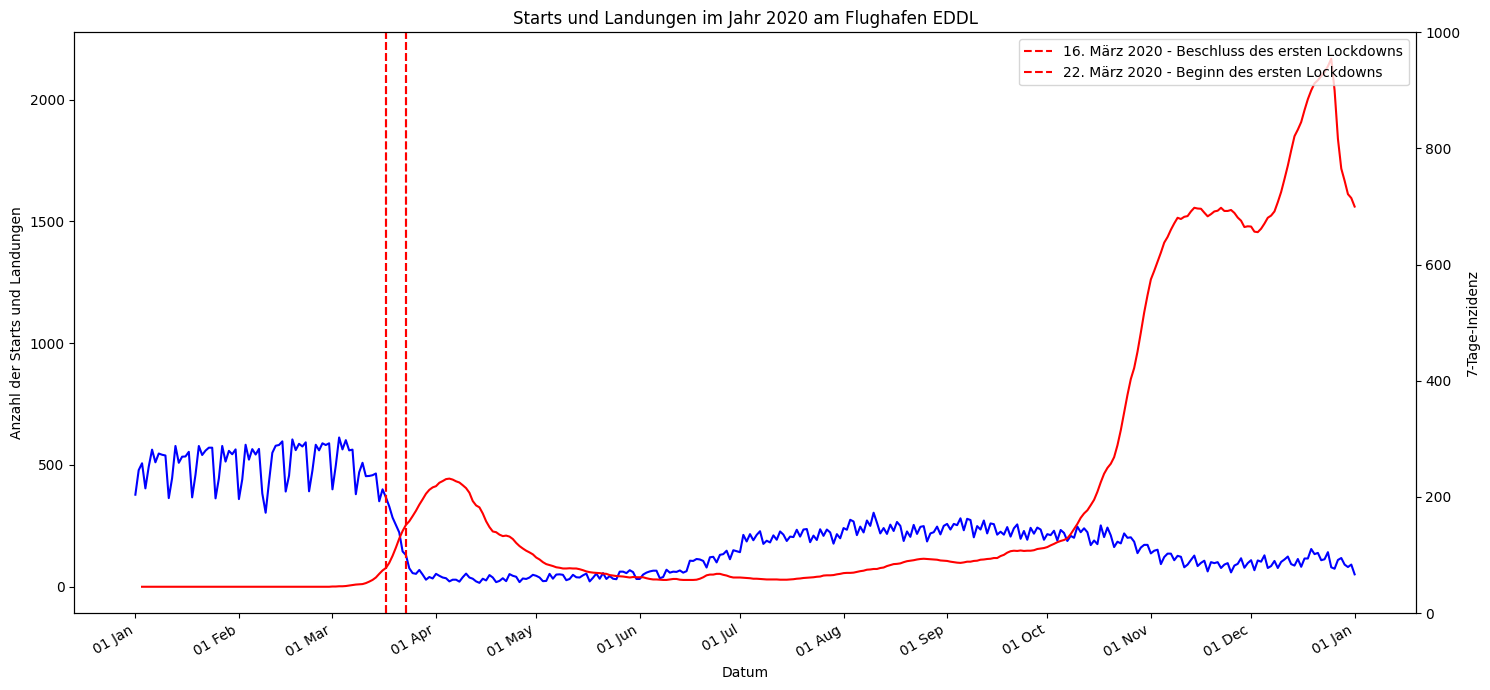

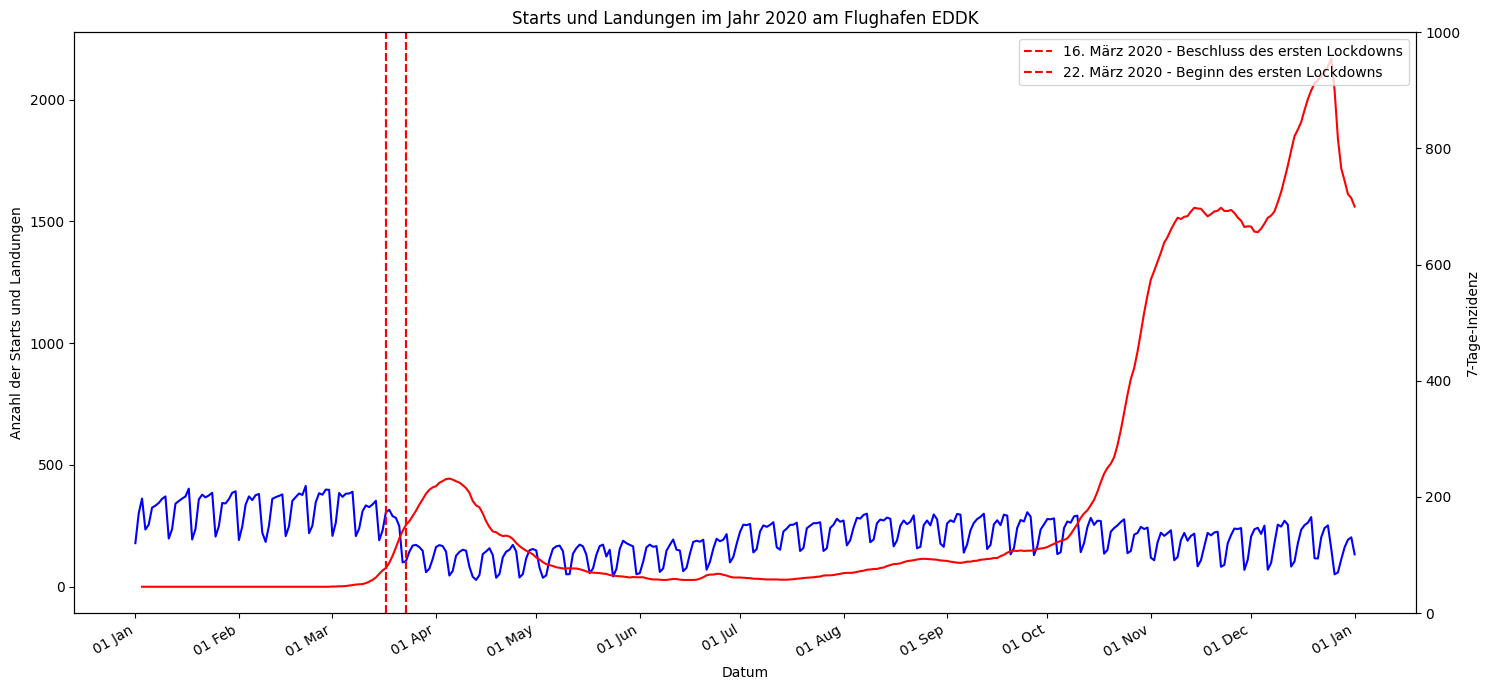

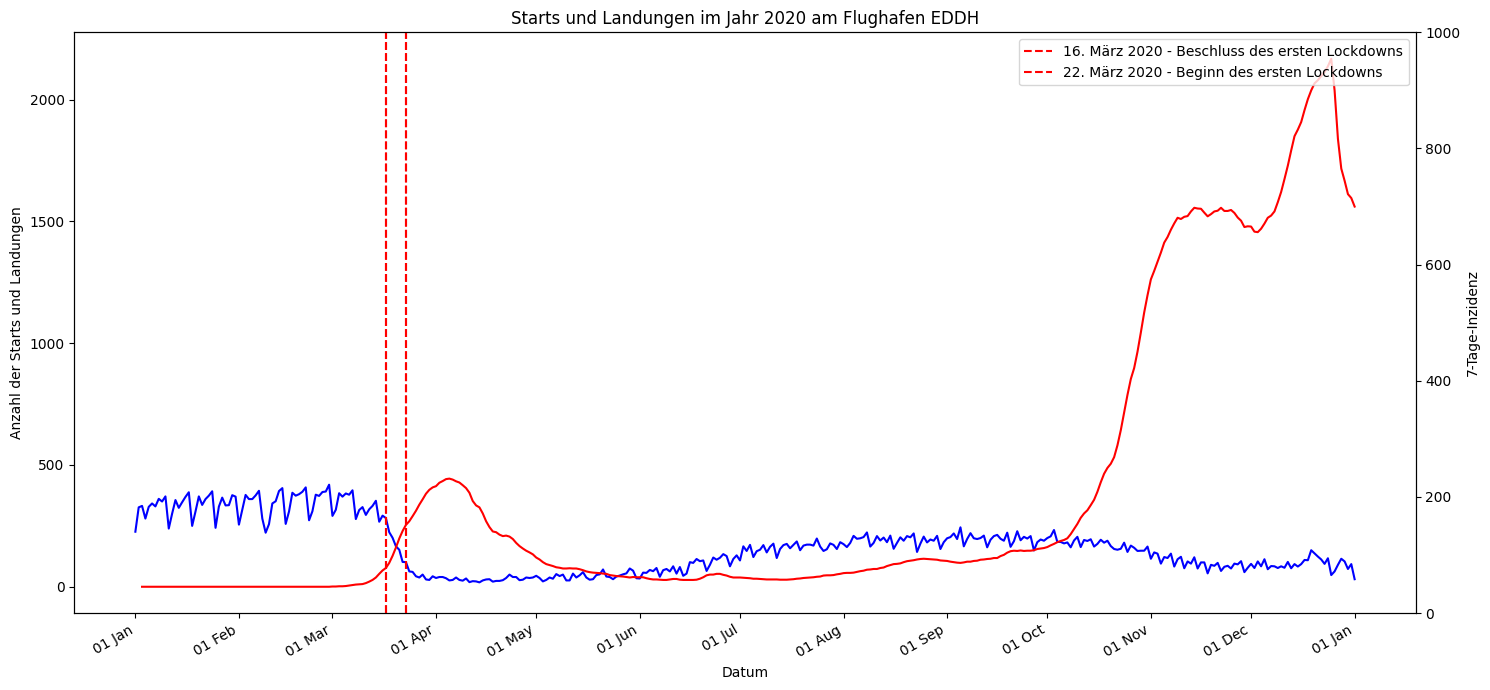

In [17]:
top_5_airports = ['EDDF', 'EDDM', 'EDDL', 'EDDK', 'EDDH']
year = 2020

filtered_covid_data_1 = df_covid19[df_covid19['Jahr'] == year]
print(filtered_covid_data_1)

for airport in top_5_airports:
    filtered_flight_data = df_flightdata[(df_flightdata['Jahr'] == year) &
                                        (df_flightdata['ICAO_Code'] == airport)]
    
    filtered_covid_data = df_covid19[df_covid19['Jahr'] == year]

    plt.figure(figsize=(15, 7))

    plt.plot(filtered_flight_data['Datum'], filtered_flight_data['Gesamte_Anzahl_an_Flügen'], label='Starts und Landungen pro Tag', color='blue')
    plt.plot(filtered_covid_data['Meldedatum'], filtered_covid_data['Inzidenz_7-Tage'], label='7-Tage-Inzidenz', color='red')

    plt.axvline(x='16.03.2020', color='red', linestyle='--')
    plt.axvline(x='22.03.2020', color='red', linestyle='--')

    plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
    plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Datum')
    plt.ylabel('Anzahl der Starts und Landungen')
    plt.title(f'Starts und Landungen im Jahr {year} am Flughafen {airport}')

    plt.gca().twinx()
    plt.ylabel('7-Tage-Inzidenz')
    plt.ylim(0, 1000)

    # Markiere den 16 und 22. März 2020 mit einer vertikalen Linie und einer anderen Farbe
    plt.axvline(x='16.03.2020', color='red', linestyle='--', label='16. März 2020 - Beschluss des ersten Lockdowns')
    plt.axvline(x='22.03.2020', color='red', linestyle='--', label='22. März 2020 - Beginn des ersten Lockdowns')

    plt.legend()
    plt.tight_layout()
    plt.show()


Der Flughafen Leipzig/Halle(EDDP) ist der zweitgrößte Frachtflughafen Deutschlands. (Quelle: https://de.statista.com/statistik/daten/studie/240402/umfrage/groesste-frachtflughaefen-deutschlands/). Hier wird auch überwiegend Fracht umgeschlagen und weniger Personenverkehr findet statt. Deshalb liegt die Vermutung nahe, dass an einem Personenflughafen, der Flugverkehr während der Coronapandemie deutlich stärker eingebrochen ist als in an diesem Frachtflughafen. Als Personenflughafen haben wir hier beispielhaft München(EDDM) gewählt.

/var/folders/qw/txn17vkn66vf_9pc5h1j29ph0000gn/T/ipykernel_82605/1823572394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freightAirportDf['Datum'] = pd.to_datetime(freightAirportDf['Datum'], dayfirst=True)
/var/folders/qw/txn17vkn66vf_9pc5h1j29ph0000gn/T/ipykernel_82605/1823572394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personAirportDf['Datum'] = pd.to_datetime(personAirportDf['Datum'], dayfirst=True)


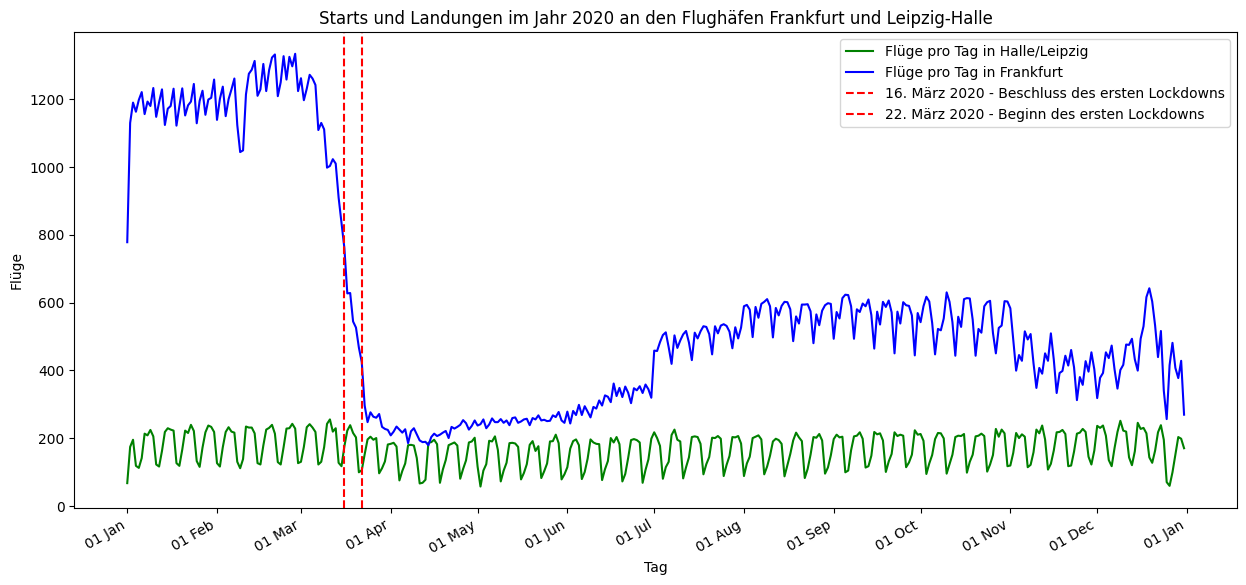

In [18]:
year = 2020
freightAirport = 'EDDP'
personAirport = 'EDDF'

plt.figure(figsize=(15, 7))

freightAirportDf = df_flightdata[(df_flightdata['Jahr'] == year) & (df_flightdata['ICAO_Code'] == freightAirport)]
personAirportDf = df_flightdata[(df_flightdata['Jahr'] == year) & (df_flightdata['ICAO_Code'] == personAirport)]

freightAirportDf['Datum'] = pd.to_datetime(freightAirportDf['Datum'], dayfirst=True)
personAirportDf['Datum'] = pd.to_datetime(personAirportDf['Datum'], dayfirst=True)

plt.plot(freightAirportDf['Datum'], freightAirportDf['Gesamte_Anzahl_an_Flügen'], label='Flüge pro Tag in Halle/Leipzig', color='green')
plt.plot(personAirportDf['Datum'], personAirportDf['Gesamte_Anzahl_an_Flügen'], label='Flüge pro Tag in Frankfurt', color='blue')
plt.title(f'Starts und Landungen im Jahr {year} an den Flughäfen Frankfurt und Leipzig-Halle')

plt.gca().xaxis.set_major_locator(date.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(date.DateFormatter('%d %b'))

plt.gcf().autofmt_xdate()

plt.xlabel('Tag')
plt.ylabel('Flüge')

plt.axvline(x=pd.Timestamp('2020-03-16'), color='red', linestyle='--', label='16. März 2020 - Beschluss des ersten Lockdowns')
plt.axvline(x=pd.Timestamp('2020-03-22'), color='red', linestyle='--', label='22. März 2020 - Beginn des ersten Lockdowns')


plt.legend()
plt.show()

Es ist deutlich zu erkennen, dass der Flugverkehr in München (blaue Kurve) mit Beginn der Coronapandemie komplett eingebrochen ist während, der Flugverkehr am Flughafen Halle/Leipzig zwar etwas eingebrochen ist sich aber gut gehalten hat.

Am 16. März 2020

Als nächstes möchten wir untersuchen, ob es Wochentage gibt an denen mehr geflogen wird. Man könnte zum Beispiel vermuten, dass an einem Sonntag weniger geflogen wird.

   Weekday  Gesamte_Anzahl_an_Flügen
0        0                   1919117
1        1                   1893071
2        2                   1963570
3        3                   1978965
4        4                   2020351
5        5                   1610009
6        6                   1752584


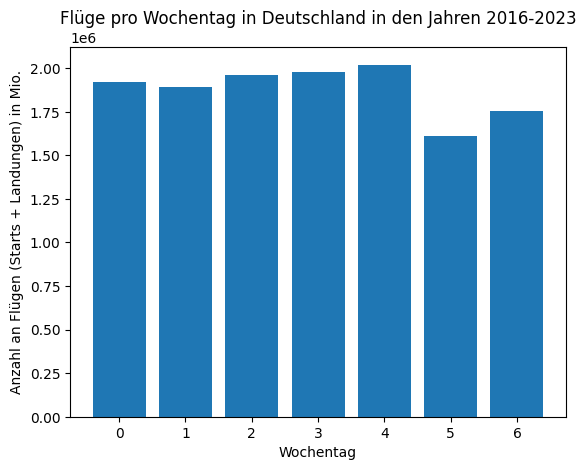

In [19]:
df_flightdata['Datum'] = pd.to_datetime(df_flightdata['Datum'],dayfirst=True)
df_flightdata['Weekday'] = df_flightdata['Datum'].dt.weekday

german_airports_statistic = df_flightdata[(df_flightdata['Land_Name'] == 'Germany')]
result = german_airports_statistic.groupby('Weekday')['Gesamte_Anzahl_an_Flügen'].sum().reset_index()
print(result)

plt.bar(result['Weekday'], result['Gesamte_Anzahl_an_Flügen'])

plt.xlabel('Wochentag')
plt.ylabel('Anzahl an Flügen (Starts + Landungen) in Mio.')
plt.title('Flüge pro Wochentag in Deutschland in den Jahren 2016-2023')

plt.show()

 Es lässt sich erkennen, dass am Wochenende insgesamt tatsächlich etwas weniger geflogen wird